In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("/home/marcus-vinicius/Desktop/Python/Machine_Leaning_Zoomcamp/Customer-Churn.csv")

In [147]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [148]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [149]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    df[c] = df[c].str.lower().str.replace('-', '_')

In [150]:
df.head().T

,0,1,2,3,4
customerid,7590_vhveg,5575_gnvde,3668_qpybk,7795_cfocw,9237_hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [152]:
df.contract.value_counts()

contract
month_to_month    3875
two_year          1695
one_year          1473
Name: count, dtype: int64

In [153]:
df.paymentmethod.value_counts()

paymentmethod
electronic_check             2365
mailed_check                 1612
bank_transfer_(automatic)    1544
credit_card_(automatic)      1522
Name: count, dtype: int64

In [154]:
df.isnull().any()

customerid          False
gender              False
seniorcitizen       False
partner             False
dependents          False
tenure              False
phoneservice        False
multiplelines       False
internetservice     False
onlinesecurity      False
onlinebackup        False
deviceprotection    False
techsupport         False
streamingtv         False
streamingmovies     False
contract            False
paperlessbilling    False
paymentmethod       False
monthlycharges      False
totalcharges        False
churn               False
dtype: bool

In [155]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472_lvygi,_
753,3115_czmzd,_
936,5709_lvoeq,_
1082,4367_nuyao,_
1340,1371_dwpaz,_
3331,7644_omvmy,_
3826,3213_vvolg,_
4380,2520_sgtta,_
5218,2923_arzlg,_
6670,4075_wkniu,_


In [156]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

df.totalcharges = df.totalcharges.fillna(0)  

In [157]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472_lvygi,0.0
753,3115_czmzd,0.0
936,5709_lvoeq,0.0
1082,4367_nuyao,0.0
1340,1371_dwpaz,0.0
3331,7644_omvmy,0.0
3826,3213_vvolg,0.0
4380,2520_sgtta,0.0
5218,2923_arzlg,0.0
6670,4075_wkniu,0.0


In [158]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [159]:
df.churn = (df.churn == 'yes').astype(int)

In [160]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [161]:
df.head().T

,0,1,2,3,4
customerid,7590_vhveg,5575_gnvde,3668_qpybk,7795_cfocw,9237_hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [163]:
from sklearn.model_selection import train_test_split

In [164]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)
# 20% out of 80% from the full_train df
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

len(df_full_train), len(df_train), len(df_val), len(df_test)

(5634, 4225, 1409, 1409)

In [165]:
# Target variables
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [166]:
# Del the targe col from the df
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [167]:
# Churn rate == %of churn clients

df_full_train.churn.value_counts(normalize = True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [168]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [169]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [170]:
# unique values in the CategorialDF
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Churn rate features: 

In [171]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

churn_female, churn_male

(0.27682403433476394, 0.2632135306553911)

In [172]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()

churn_no_partner, churn_partner

(0.3298090040927694, 0.20503330866025166)

In [173]:
global_churn_rate - churn_no_partner

-0.05984095297455855

Generalizing Feature Importance

In [174]:
from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month_to_month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


Mutal information 

In [175]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [176]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

mi = df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending= False)
mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [177]:
df_full_train[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 1814 to 5157
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          5634 non-null   int64  
 1   monthlycharges  5634 non-null   float64
 2   totalcharges    5634 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 176.1 KB


In [178]:
df_full_train.tenure.max()

72

In [179]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [180]:
''' 
One-Hot Enconding
same as:
 for v in [2, 3, 4]:
        df['num_doors_{}'.format(v)] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_{}'.format(v))
'''

" \nOne-Hot Enconding\nsame as:\n for v in [2, 3, 4]:\n        df['num_doors_{}'.format(v)] = (df.number_of_doors == v).astype('int')\n        features.append('num_doors_{}'.format(v))\n"

In [181]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train[categorical + numerical].to_dict(orient= 'records')

train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [182]:
# Train features Matrix
dv = DictVectorizer(sparse= False)
X_train = dv.fit_transform(train_dicts)
X_train[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03])

In [183]:
# Val features Matrix
val_dicts = df_val[categorical + numerical].to_dict(orient= 'records')
X_val = dv.transform(val_dicts)
X_val[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 7.0850e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 4.9734e+03])

Logistic Regression:

In [184]:
# Signoid Function  
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) 
#create an array with 51 values between -7 and 7
z = np.linspace(-7, 7, 51)
sigmoid(z)


array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

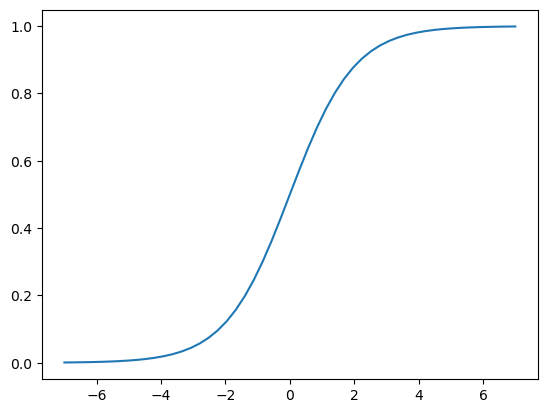

In [185]:
plt.plot(z, sigmoid(z))
plt.show()

In [186]:
# Linear Regression Function
'''
def linear_regression(xi):
    result = w0
    for j in range(len(w)):
        result = result + xi[j]*w[j]
    return result

or 

def train_linear_regression_reg(X, y, r= 0.001):
    # New col of X
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    # Matrix operations
    XTX = X.T.dot(X)
    #Add r to all values in the diagonal
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv).round(1)
    # Normal equation
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]
'''

'\ndef linear_regression(xi):\n    result = w0\n    for j in range(len(w)):\n        result = result + xi[j]*w[j]\n    return result\n\nor \n\ndef train_linear_regression_reg(X, y, r= 0.001):\n    # New col of X\n    ones = np.ones(X.shape[0])\n    X = np.column_stack([ones, X])\n    # Matrix operations\n    XTX = X.T.dot(X)\n    #Add r to all values in the diagonal\n    XTX = XTX + r * np.eye(XTX.shape[0])\n    XTX_inv = np.linalg.inv(XTX)\n    XTX.dot(XTX_inv).round(1)\n    # Normal equation\n    w_full = XTX_inv.dot(X.T).dot(y)\n\n    return w_full[0], w_full[1:]\n'

In [187]:
# Logistic regression function
def linear_regression(xi):
    score = w0
    for j in range(len(w)):
        score = score + xi[j]*w[j]
    result = sigmoid(score)
    return result


Training Logistic Regression with Sklearn

In [188]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [189]:
model.intercept_[0]

-0.1090339889680666

In [190]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [191]:
# hard prediction(We dont know the certainty of these predictions)
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [192]:
# Soft predictions(We have a Prob of the target)
model.predict_proba(X_train)[:,1]

array([0.09547789, 0.67932953, 0.63367898, ..., 0.53162084, 0.04254349,
       0.69872975])

In [193]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00899664, 0.20452356, 0.21222306, ..., 0.13638836, 0.79977075,
       0.83740807])

In [194]:
churn_decision = (y_pred >= 0.5)
df_val[churn_decision].customerid

2504    8433_wxgna
4597    3440_jpscl
2343    2637_fkfsy
5591    7228_omtpn
4482    6711_fldfb
           ...    
2611    5976_jcjrh
4211    2034_cgrhz
3999    5276_kqwhg
6240    6521_yytyi
5282    3049_solay
Name: customerid, Length: 311, dtype: object

In [195]:
# Model accuracy
(y_val == churn_decision).mean()

0.8034066713981547

Look at our coefficients

In [196]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month_to_month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [197]:
small = ['contract', 'tenure', 'monthlycharges']
df_small = df_train[small].to_dict(orient= 'records')
df_small

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month_to_month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month_to_month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month_to_month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month_to_month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month_to_month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month_to_month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month_to_month', 'tenure': 6, 'monthlycharges': 109.9},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 99.9},
 {'contract': 'month_to_month', 'tenure': 17, 'monthlycharges': 102.55},
 {'contract': 'two_year', 'tenure': 66, 'monthlycharges': 58.2},
 {'contract': 'month_to_month', 'tenure': 2, 'monthlycharges': 68.95},
 {'contract': 'month_to_month', 't

In [198]:
dicts_train_small = df_train[small].to_dict(orient= 'records')
dicts_val_small = df_val[small].to_dict(orient= 'records')

In [199]:
dv_small = DictVectorizer(sparse= False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [200]:
dv_small.get_feature_names_out()

array(['contract=month_to_month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [201]:
X_train_small = dv_small.transform(dicts_train_small)
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [202]:
model_small.intercept_[0]

-2.476775662927698

In [203]:
model_small.coef_[0]

array([ 0.97004492, -0.0251365 , -0.94872201,  0.02748236, -0.03618424])

In [204]:
 dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month_to_month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Training and using the model:

In [205]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient= 'records')
dv_full_train = DictVectorizer(sparse= False)

X_full_train = dv_full_train.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

In [206]:
model_full_train = LogisticRegression()
model_full_train.fit(X_full_train, y_full_train)

LogisticRegression()

In [207]:
model_full_train.intercept_[0].round(4)

-0.1236

In [208]:
model_full_train.coef_[0].round(4)

array([ 0.2678, -0.1528, -0.2383,  0.0294, -0.1526,  0.0661, -0.0915,
       -0.0978, -0.052 , -0.0713, -0.2977,  0.2659, -0.0915,  0.0036,
       -0.2211,  0.032 ,  0.0658,  0.089 , -0.0915, -0.1208,  0.2317,
       -0.0915, -0.2634, -0.2686,  0.1454, -0.067 , -0.0563, -0.0859,
       -0.105 ,  0.2609, -0.1933,  0.032 , -0.1553,  0.1786, -0.0961,
       -0.0915,  0.0644, -0.0597, -0.0915,  0.0279,  0.2485, -0.0915,
       -0.2802, -0.0664,  0.0003])

In [209]:
dicts_test = df_test[categorical + numerical].to_dict(orient= 'records')
X_test = dv.transform(dicts_test)

In [210]:
y_pred = model_full_train.predict_proba(X_test)[:,1]

In [211]:
churn_decision = (y_pred >= 0.5)
(y_test == churn_decision).mean()

0.815471965933286

In [219]:
# testing the model
customer = dicts_test[-1]
X_customer = dv.transform([customer])
dicts_test[-1]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month_to_month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [220]:
# Predicted churn value
model_full_train.predict_proba(X_customer)[:, 1]

array([0.59688521])

In [221]:
# Real churn value
y_test[-1]

1